In [219]:
import pandas as pd
import pickle
import json
import seaborn as sns
import pprint
import json
import glob
import os
import numpy as np
from ast import literal_eval
pp = pprint.PrettyPrinter(depth=6)
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (15.0, 5.0)
pd.set_option('display.max_columns', 120)
pd.set_option('display.max_rows', 120)

In [220]:
import git
git = git.Git("../../../sonarqube/") 

In [221]:
szz_folder = "../../szz"
csv_folder = "../../csv"

### Import issues

In [222]:
issues = pd.read_csv(f"{csv_folder}/issues.csv", index_col=0)
for date_field in ["created", "duedate", "lastViewed", "resolutiondate", "updated"]:
    issues[date_field] = pd.to_datetime(issues[date_field], errors="coerce")
issues = issues[issues.created > '2015-03-17 15:04:32+0000']
issues.head()

/Library/Python/3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (4,6,9,12,13,17,19,22,41,42,43,60,61,82,84,89) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,issue_key,issue_id,issuetype,customfield_12130,customfield_11041,customfield_12132,customfield_12131,project,customfield_12134,customfield_12530,fixVersions,customfield_12133,customfield_12136,customfield_12532,resolution,customfield_10431,customfield_12135,customfield_12531,customfield_12138,customfield_10432,customfield_12534,customfield_12137,customfield_10433,customfield_12533,customfield_11832,customfield_11831,customfield_11833,resolutiondate,workratio,lastViewed,watches,created,customfield_11032,customfield_11033,priority,edition,customfield_11233,customfield_11036,customfield_11830,labels,customfield_11631,customfield_11038,customfield_10930,customfield_11347,customfield_10931,customfield_10932,versions,issuelinks,assignee,updated,status,components,customfield_12031,customfield_11140,customfield_12030,customfield_12033,customfield_11141,description,customfield_12032,customfield_12034,customfield_12430,customfield_11344,customfield_11343,customfield_10530,customfield_11345,customfield_10730,customfield_11337,customfield_11930,customfield_11139,customfield_11338,summary,creator,subtasks,customfield_11130,customfield_11131,reporter,customfield_11132,customfield_11133,customfield_10243,customfield_11335,customfield_11334,customfield_11730,customfield_10434,customfield_12536,customfield_12535,customfield_12139,environment,customfield_12538,customfield_10437,customfield_12537,customfield_10438,duedate,votes,issuetype_id,issuetype_name,priority_id,priority_name,assignee_key,assignee_name,reporter_key,reporter_name,creator_key,creator_name,status_id,status_name,resolution_id,resolution_name,votes_votes
0,SONAR-13913,97898,Task,P3-Medium,0|i0dkhb:,No root cause identified,NaN,SONAR,Not captured yet,NaN,[],Not assessed yet,Not captured yet,NaN,NaN,NaN,No action plan,NaN,Not captured yet,NaN,NaN,Not captured yet,NaN,NaN,NaN,NaN,NaN,NaT,-1,NaT,<JIRA Watchers at 5060633888>,2020-09-29 08:54:53+00:00,NaN,NaN,Major,Community,NaN,NaN,NaN,[],None,NaN,NaN,NaN,NaN,NaN,[],[],NaN,2020-09-29 08:54:53+00:00,Open,"[<JIRA Component: name='Database', id='11077'>]",NaN,NaN,NaN,NaN,NaN,- Remove org.sonar.server.platform.BackendClea...,NaN,SonarQube,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,Remove table clean up used in Integration Tests,Julien Lancelot,[],NaN,NaN,Julien Lancelot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NaN,NaN,NaN,NaN,,NaN,[],NaT,0,3,Task,3,Major,NaN,NaN,julien.lancelot,julien.lancelot,julien.lancelot,julien.lancelot,1,Open,NaN,NaN,0
1,SONAR-13912,97868,Task,P3-Medium,0|i0dkav:,No root cause identified,NaN,SONAR,Not captured yet,NaN,[],Not assessed yet,Not captured yet,NaN,NaN,NaN,No action plan,NaN,Not captured yet,NaN,NaN,Not captured yet,NaN,NaN,NaN,NaN,NaN,NaT,-1,NaT,<JIRA Watchers at 5061570768>,2020-09-28 10:14:16+00:00,NaN,NaN,Major,Community,NaN,NaN,NaN,['trello:5f71b7467b498d57987bfe0a'],None,NaN,NaN,NaN,NaN,NaN,[],[<JIRA IssueLink: id='53803'>],Malena Ebert,2020-09-28 10:18:24+00:00,Open,[],NaN,NaN,NaN,NaN,NaN,The goal of this task is to detect vulnerabili...,NaN,SonarQube,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,Add OWASP Dependency Check task to Cirrus CI,Malena Ebert,[],NaN,NaN,Malena Ebert,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NaN,NaN,NaN,NaN,,NaN,[],NaT,0,3,Task,3,Major,malena.ebert,malena.ebert,malena.ebert,malena.ebert,malena.ebert,malena.ebert,1,Open,NaN,NaN,0
2,SONAR-13910,97864,Improvement,P3-Medium,0|i0dka7:,No root cause identified,NaN,SONAR,Not captured yet,NaN,"[<JIRA Version: name='8.5', id='16342'>]",Not assessed yet,Not captured yet,NaN,NaN,NaN,No action plan,NaN,Not captured yet,NaN,NaN,Not captured yet,NaN,NaN,NaN,NaN,NaN,NaT,-1,NaT,<JIRA Watchers at 5061573984>,2020-09-28 09:56:03+00:00,NaN,NaN,Major,Developer,NaN,NaN,NaN,[],None,NaN,NaN,NaN,NaN,NaN,[],[],Julien Lancelot,2020-09-28 19:33:18+00:00,In Review,[],NaN,NaN,NaN,NaN,NaN,The changes are:\r\n * faster analysis for pro...,NaN,SonarQube,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,C/C++/Objective-C analysis updates,Evgeny Mandrikov,[],NaN,NaN,Evgeny Mandrikov,NaN,NaN,Na

### Import fixversions

In [223]:
fixversions = pd.read_csv(f"{csv_folder}/issues_fixversions.csv", index_col=0)
fixversions.head(5)

,issue_id,fixVersion_name,fixVersion_id
0,97864,8.5,16342
1,97858,8.5,16342
2,97855,8.5,16342
3,97786,8.6,16435
4,97773,8.5,16342


### Import versions

In [224]:
versions = pd.read_csv(f"{csv_folder}/issues_versions.csv", index_col=0)
versions.head(5)

,issue_id,version_name,version_id
0,97777,8.4.2,16404
1,97773,8.4.2,16404
2,97525,8.4.2,16404
3,97521,8.4,15833
4,97347,8.4.2,16404


### Import tags

In [225]:
tags = pd.read_csv(f"{csv_folder}/tags.csv", index_col=0)
tags.Date = pd.to_datetime(tags.Date)
tags["month"] = tags.Date.dt.month
tags["year"] = tags.Date.dt.year
tags

,Tag,Sha,Date,Tag_number,month,year
0,latest-silver-master-#65,639ab0ae52d143cf8b8b82c009c95e69ed2d40d7,2015-01-30 10:12:28,latest-silver-master-#65,1,2015
1,8.4.2.36762,2de1f343e3dbd9e88007b42e475512677c04eb8a,2020-08-27 14:11:31,8.4.2.36762,8,2020
2,8.4.1.35646,a0d372f704998d38856c26e28662fd7de062f873,2020-07-14 08:13:18,8.4.1.35646,7,2020
3,8.4.0.35506,74b4533439f380827d68e8c01667eeaecad89fc7,2020-07-03 07:09:27,8.4.0.35506,7,2020
4,8.3.1.34397,b77ce511a2039330aea8832ad12e86a8cfa9ff7d,2020-05-07 12:09:22,8.3.1.34397,5,2020
...,...,...,...,...,...,...
181,2.10,43f27118331e8395365562c3859986489e38fb0a,2011-08-18 10:56:47,2.10,8,2011
182,2.9,d0d00d0874464b462e07dca0755ad662538395f2,2011-07-17 20:34:06,2.9,7,2011
183,2.8,9b97642bcdbf8060544ab96396da3600dc701e19,2011-05-18 18:30:23,2.8,5,2011
184,2.7,a823384d188516cb00088b6dd7d4ca66a21f5c77,2011-03-31 17:17:07,2.7,3,2011


## Szz Unleashed - Bug issues with Affected Version
* python3 fetch_jira_bugs/fetch.py --issue-code SONAR --jira-project jira.sonarsource.com
* python3 fetch_jira_bugs/git_log_to_array.py --repo-path ../sonarqube --from-commit b326bfd875b0b41
* python3 fetch_jira_bugs/find_bug_fixes.py --gitlog gitlog.json --issue-list issue/ --gitlog-pattern "SONAR-{nbr}"
* java -jar build/libs/szz_find_bug_introducers-0.1.jar -i ../issue_list.json -r ../../sonarqube/

In [226]:
working_folder = "compare_parameters_unleashed/smaller-subset-test"

In [227]:
szz_files = glob.glob(f"{szz_folder}/{working_folder}/issues/*.json")
szz_files

['../../szz/compare_parameters_unleashed/smaller-subset-test/issues/fix_and_introducers_pairs_4.json',
 '../../szz/compare_parameters_unleashed/smaller-subset-test/issues/fix_and_introducers_pairs_5.json',
 '../../szz/compare_parameters_unleashed/smaller-subset-test/issues/fix_and_introducers_pairs_2.json',
 '../../szz/compare_parameters_unleashed/smaller-subset-test/issues/fix_and_introducers_pairs_3.json',
 '../../szz/compare_parameters_unleashed/smaller-subset-test/issues/fix_and_introducers_pairs_0.json',
 '../../szz/compare_parameters_unleashed/smaller-subset-test/issues/fix_and_introducers_pairs_1.json',
 '../../szz/compare_parameters_unleashed/smaller-subset-test/issues/fix_and_introducers_pairs_6.json',
 '../../szz/compare_parameters_unleashed/smaller-subset-test/issues/fix_and_introducers_pairs_7.json']

### Bug fixing commits

In [228]:
data = {}
for szz_file in szz_files:
    with open(szz_file, "r") as f:
        data.update(json.load(f))

In [229]:
fields =[ 'creationdate',
 'resolutiondate',
 'commitdate',
 'hash']

In [230]:
tuples = []
for key in data.keys():
    inner_tuple = []
    inner_tuple.append(key)
    for field in fields:
        inner_tuple.append(data[key][field])
    tuples.append(tuple(inner_tuple))
issues_fixing_commit = pd.DataFrame(tuples, columns=["issue_name"]+fields)
issues_fixing_commit

,issue_name,creationdate,resolutiondate,commitdate,hash
0,SONAR-6715,2015-07-15 08:29:57 +0200,2015-07-22 09:54:57 +0200,2015-07-22 11:53:35 +0200,1ef10758eb1c939a60e159758de2603b87ec859d
1,SONAR-6659,2015-06-18 15:13:52 +0200,2015-06-23 07:55:23 +0200,2015-06-22 10:52:06 +0200,e5a7b62cb7ceef25cf656d9423e4a4b46fec8afa
2,SONAR-6718,2015-07-15 12:11:04 +0200,2015-07-15 12:34:41 +0200,2015-07-15 14:34:23 +0200,0e95468857452a3a61ca0f697d17f3332ebb48fc
3,SONAR-6815,2015-08-27 08:25:44 +0200,2015-09-18 09:51:25 +0200,2015-09-11 09:31:59 +0200,77547b4944e0e86dfe27cd98e1811e18d770da9c
4,SONAR-6657,2015-06-17 12:26:15 +0200,2015-08-18 14:50:47 +0200,2015-08-18 15:39:55 +0200,4c358f8ee89cddc977c8f1d9329c5ae22a0475c9
5,SONAR-6613,2015-06-04 14:30:15 +0200,2016-05-18 11:13:35 +0200,2016-05-17 15:12:54 +0200,0f906cccf16b98864d8f2dd1ae3966b60fb8ac4a
6,SONAR-6831,2015-09-03 12:09:33 +0200,2015-09-22 15:43:52 +0200,2015-09-28 11:16:29 +0200,d5302c2e5cf81f2794294ae49c1996538b38e8d4
7,SONAR-6655,2015-06-17 12:23:22 +0200,2015-08-19 08:25:25 +0200,2015-08-18 15:50:49 +0200,2cc874a266bae362d26b69ce0e8e8ed0d0708b67
8,SONAR-6424,2015-04-15 11:03:16 +0200,2016-05-09 14:50:09 +0200,2016-05-09 14:49:51 +0200,84d384a1dcf882eee912033382831968f6949cce
9,SONAR-6566,2015-05-20 06:39:22 +0200,2015-05-20 07:47:05 +0200,2015-05-20 13:47:28 +0200,e4c01a6e0c962a41b23a4f10f146a9a2a9c01e80


## Load data

In [231]:
def load_fix_inducers(folder):
    szz_inducing_folders = list(filter(lambda path: True if os.path.isdir(path) else False, glob.glob(f"{szz_folder}/{working_folder}/{folder}/results/*")))
    szz_inducing_files = list(filter(lambda path: True if (os.path.isfile(path) and ("fix_and_introducers_pairs" in path)) else False, glob.glob(f"{szz_folder}/{working_folder}/{folder}/results/*")))
    fix_and_introducers_pairs = []

    for file in szz_inducing_files:
        with open(file, "r") as f:
            fix_and_introducers_pairs.append(json.load(f))

    for folder in szz_inducing_folders:
        with open(f"{folder}/fix_and_introducers_pairs.json", "r") as f:
            fix_and_introducers_pairs.append(json.load(f))
            
    fix_and_introducers_pairs_tuples = []
    for pair_list in fix_and_introducers_pairs:
        for pair in pair_list:
            fix_and_introducers_pairs_tuples.append((pair[0], pair[1]))
    fix_and_introducers = pd.DataFrame(fix_and_introducers_pairs_tuples, columns=["fixing_commit", "inducing_commit"])

    return fix_and_introducers

### Load simple depth 3

In [232]:
depth_3 = load_fix_inducers("simple_depth_3")
depth_3 = depth_3.drop_duplicates(subset=["fixing_commit", "inducing_commit"], keep="first")

### Load simple depth 5

In [233]:
depth_5 = load_fix_inducers("simple_depth_5")
depth_5 = depth_5.drop_duplicates(subset=["fixing_commit", "inducing_commit"], keep="first")

### Retrieve tags for commits

In [234]:
def find_first_tag_contains_commit(commit):
    tags = git.tag("--contains", commit).split("\n")
    if len(tags) > 0:
        return tags[0]
    return None

def all_tag_contains_commit(commit):
    tags = git.tag("--contains", commit).split("\n")
    return tags

def find_all_tags_for_df(df, newColumn, func, field):
    cache = {}
    df[newColumn] = np.nan
    for i, row in df.iterrows():
        if(not row[field] in cache):
            cache[row[field]] = func(row[field])
        else:
            row[newColumn] = cache[row[field]]
        if(i%100 == 0):
            print(i)
            print(cache)

In [235]:
from pandarallel import pandarallel
pandarallel.initialize()

dataframes = [depth_3, depth_5]

#for df in dataframes:
    #df["all_affected_tags_fixing"] = df.fixing_commit.parallel_apply(lambda sha: all_tag_contains_commit(sha))
    #df["all_affected_tags_inducing"] = df.inducing_commit.apply(lambda sha: all_tag_contains_commit(sha))

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


#depth_3.to_csv(f"{csv_folder}/fix_and_introducers_simple_depth_3.csv")
#depth_5.to_csv(f"{csv_folder}/fix_and_introducers_simple_depth_5.csv")

### Reloading from csv

In [236]:
def load_df(name):
    df = pd.read_csv(f"{csv_folder}/{name}.csv", index_col=0)
    df['all_affected_tags_fixing'] = df['all_affected_tags_fixing'].apply(lambda x: literal_eval(x))
    df['all_affected_tags_inducing'] = df['all_affected_tags_inducing'].apply(lambda x: literal_eval(x))
    df["tags_affected_only_inducing"] = df.apply(\
                                                                               lambda row: list(set(row.all_affected_tags_inducing)\
                                                                               .difference(set(row.all_affected_tags_fixing))),axis=1)
    return df
depth_3 = load_df("fix_and_introducers_simple_depth_3")                        
depth_5 = load_df("fix_and_introducers_simple_depth_5")

## Analysis

### Merging all datasets

In [237]:
versions = versions.merge(issues[["issue_key", "issue_id"]])
versions

,issue_id,version_name,version_id,issue_key
0,97777,8.4.2,16404,SONAR-13902
1,97773,8.4.2,16404,SONAR-13900
2,97525,8.4.2,16404,SONAR-13875
3,97521,8.4,15833,SONAR-13874
4,97347,8.4.2,16404,SONAR-13855
...,...,...,...,...
1002,29731,4.5.1,11621,SONAR-6348
1003,27612,5.1,11627,SONAR-6346
1004,27863,5.1,11627,SONAR-6340
1005,27851,4.5,11620,SONAR-6336


In [238]:
versions_list = versions.groupby(["issue_id", "issue_key"]).version_name.apply(list).reset_index()
versions_list = versions_list.rename(columns={"version_name":"versions"})
versions_list

,issue_id,issue_key,versions
0,27612,SONAR-6346,[5.1]
1,27851,SONAR-6336,[4.5]
2,27863,SONAR-6340,[5.1]
3,29665,SONAR-6351,[5.1]
4,29688,SONAR-6374,[5.1]
...,...,...,...
811,97347,SONAR-13855,[8.4.2]
812,97521,SONAR-13874,[8.4]
813,97525,SONAR-13875,[8.4.2]
814,97773,SONAR-13900,[8.4.2]


In [239]:
def merge_with_versions(df):
    merge = versions_list.merge(issues_fixing_commit, left_on="issue_key", right_on="issue_name")
    inducing_and_versions = df[df.index.isin(df[["fixing_commit", "inducing_commit"]].drop_duplicates().index)]
    merge = merge.merge(inducing_and_versions[["fixing_commit", "inducing_commit", "tags_affected_only_inducing", "all_affected_tags_inducing"]], left_on="hash", right_on="fixing_commit")
    return merge

depth_3_merged = merge_with_versions(depth_3)
depth_5_merged = merge_with_versions(depth_5)

**Uniform versions from Jira to Github**

In [240]:
map_versions = {"8.5.0.37579": "8.5",
               "8.4.0.35506": "8.4",
               "8.3.0.34182": "8.3",
               "8.2.0.32929": "8.2",
               "8.1.0.31237": "8.1",
               "8.4.2.36762": "8.4.2",
               "8.4.1.35646": "8.4.1"}

In [241]:
def replace_versions(tags):
    for i, tag in enumerate(tags):
       if(tag in map_versions):
        tags[i] = map_versions[tag]
    return tags
for df in [depth_3_merged, depth_5_merged]:
    df.all_affected_tags_inducing = df.all_affected_tags_inducing.apply(replace_versions)
    df.tags_affected_only_inducing = df.tags_affected_only_inducing.apply(replace_versions)

In [242]:
def set_intersection(series):
    ret_val = set()
    for i, l in enumerate(series):
        if i == 0:
            ret_val = set(l)
        else:
            ret_val = ret_val.intersection(set(l))
    return list(ret_val)

def set_union(series):
    ret_val = set()
    for i, l in enumerate(series):
        if i == 0:
            ret_val = set(l)
        else:
            ret_val = ret_val.union(set(l))
    return list(ret_val)

def merge_tags(df):
    intersection = df.groupby('issue_id').tags_affected_only_inducing.apply(set_intersection).reset_index()
    union = df.groupby('issue_id').tags_affected_only_inducing.apply(set_union).reset_index()
    x = intersection.merge(union, on="issue_id", suffixes =["_intersection","_union"])
    x = x.rename(columns={"tags_affected_only_inducing_intersection":"tags_intersection",
                      "tags_affected_only_inducing_union": "tags_union"})
    return x

def merge_with_versions(df):
    merge = versions_list.merge(df, on="issue_id")
    return merge
    
depth_3_final = merge_with_versions(merge_tags(depth_3_merged))
depth_5_final = merge_with_versions(merge_tags(depth_5_merged))

**Number of issues for which SZZ was able to find an inducing commit**

In [243]:
for df in [depth_3_merged, depth_5_merged]:
    print(df.issue_id.nunique())

31
31


**Number of inducing commit per issue**

In [244]:
for df in [depth_3_merged, depth_5_merged]:
    print(df.groupby("issue_id").inducing_commit.count().value_counts().sort_index())

1     8
2     4
3     3
4     1
5     2
6     2
7     1
8     3
9     1
11    1
14    2
19    1
24    1
53    1
Name: inducing_commit, dtype: int64
1     9
2     4
3     3
4     1
5     5
6     1
8     4
10    2
11    1
13    1
Name: inducing_commit, dtype: int64


**How many issues have their version among the predicted ones by SZZ?**

In [245]:
for df in [depth_3_final, depth_5_final]:
    df["intersection_versions_tags_intersection"] = df.apply(lambda row: len(set(row.versions).intersection(row.tags_intersection)), axis=1)
    df["intersection_versions_tags_union"] = df.apply(lambda row: len(set(row.versions).intersection(row.tags_union)), axis=1)

In [246]:
for df in [depth_3_final, depth_5_final]:
    print(df.intersection_versions_tags_intersection.value_counts(normalize=True).sort_index())
    print(df.intersection_versions_tags_union.value_counts(normalize=True).sort_index())

0    0.225806
1    0.677419
2    0.064516
3    0.032258
Name: intersection_versions_tags_intersection, dtype: float64
0    0.064516
1    0.774194
2    0.129032
3    0.032258
Name: intersection_versions_tags_union, dtype: float64
0    0.193548
1    0.709677
2    0.064516
3    0.032258
Name: intersection_versions_tags_intersection, dtype: float64
0    0.064516
1    0.774194
2    0.129032
3    0.032258
Name: intersection_versions_tags_union, dtype: float64


**How many issue have all the affected Versions in the SZZ versions?**

In [247]:
for df in [depth_3_final, depth_5_final]:
    df["full_intersection_intersection"] = df.apply(lambda row: row.intersection_versions_tags_intersection == len(row.versions), axis=1)
    df["full_intersection_union"] = df.apply(lambda row: row.intersection_versions_tags_union == len(row.versions), axis=1)

In [248]:
for df in [depth_3_final, depth_5_final]:
    print(df.full_intersection_intersection.value_counts(normalize=True).sort_index())
    print(df.full_intersection_union.value_counts(normalize=True).sort_index())

False    0.258065
True     0.741935
Name: full_intersection_intersection, dtype: float64
False    0.064516
True     0.935484
Name: full_intersection_union, dtype: float64
False    0.225806
True     0.774194
Name: full_intersection_intersection, dtype: float64
False    0.064516
True     0.935484
Name: full_intersection_union, dtype: float64


**What is the ratio between the intersection and the number of reported versions on Jira?**

In [249]:
for df in [depth_3_final, depth_5_final]:
    df["intersection_ratio_intersection"] = df.apply(lambda row: row.intersection_versions_tags_intersection / len(row.versions), axis=1)
    df["intersection_ratio_union"] = df.apply(lambda row: row.intersection_versions_tags_union / len(row.versions), axis=1)

In [250]:
for df in [depth_3_final, depth_5_final]:
    print(df.intersection_ratio_intersection.value_counts(normalize=True).sort_index())
    print(df.intersection_ratio_union.value_counts(normalize=True).sort_index())

0.0    0.225806
0.5    0.032258
1.0    0.741935
Name: intersection_ratio_intersection, dtype: float64
0.0    0.064516
1.0    0.935484
Name: intersection_ratio_union, dtype: float64
0.0    0.193548
0.5    0.032258
1.0    0.774194
Name: intersection_ratio_intersection, dtype: float64
0.0    0.064516
1.0    0.935484
Name: intersection_ratio_union, dtype: float64


**Number of SZZ tags compared to Jira ones**

In [251]:
for df in [depth_3_final, depth_5_final]:
    df["szz_size_jira_ratio_intersection"] = df.apply(lambda row: len(row.tags_intersection) / len(row.versions), axis=1)
    df["szz_size_jira_ratio_union"] = df.apply(lambda row: len(row.tags_union) / len(row.versions), axis=1)

In [252]:
for df in [depth_3_final, depth_5_final]:
    print(f"Intersection median: {df.szz_size_jira_ratio_intersection.median()}")
    print(f"Intersection mean: {df.szz_size_jira_ratio_intersection.mean()}")
    print(f"Union median: {df.szz_size_jira_ratio_union.median()}")
    print(f"Union mean: {df.szz_size_jira_ratio_union.mean()}")

Intersection median: 6.0
Intersection mean: 17.666666666666668
Union median: 12.0
Union mean: 29.623655913978496
Intersection median: 6.0
Intersection mean: 18.053763440860216
Union median: 12.0
Union mean: 29.075268817204304


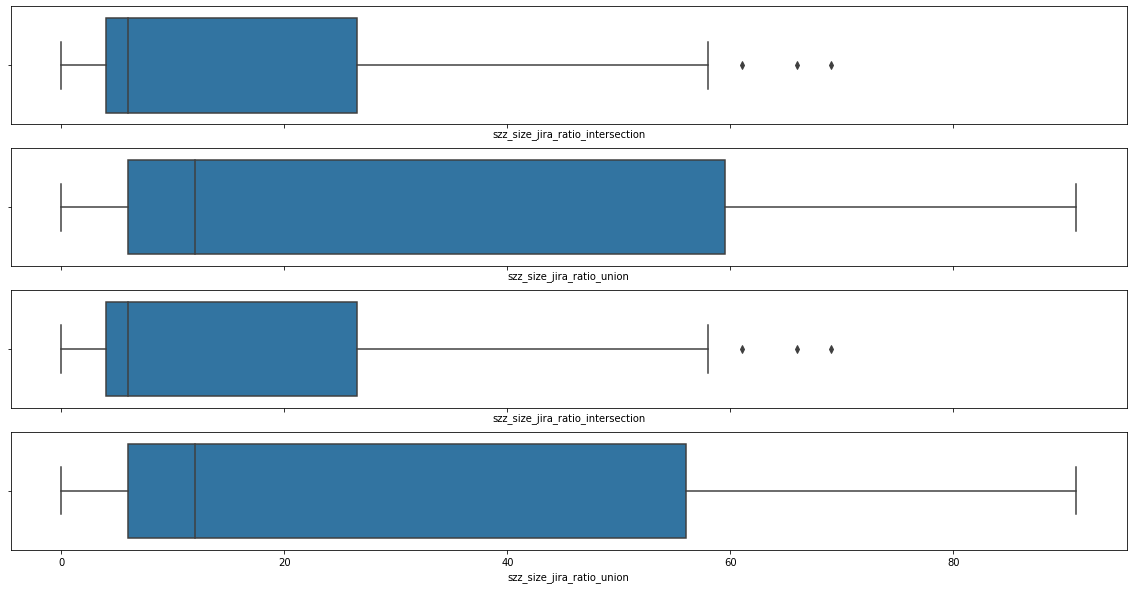

In [253]:
fig, axes =plt.subplots(4,1, sharex=True, figsize=(20, 10))
i = 0
for df in [depth_3_final, depth_5_final]:
    sns.boxplot(x=df.szz_size_jira_ratio_intersection,ax=axes[i])
    i+=1
    sns.boxplot(x=df.szz_size_jira_ratio_union, ax=axes[i])
    i+=1

Given that each issue could be reported more inducing commits, and that the number of these commits is not uniform, our analysis could be biased by results of issues with many commits. We therefore merged the tags of these commits into one list using the following set functions: intersection(I) and union(U).

From the number of issues with at least one match in the SZZ reported tags we observe:
* The intersection of tags for depth 5 performs better (81%) than depth 3 (78%)
* Union is the same for both (94%)

Full intersection:
* Same for union (93%)
* Better for depth 5 (77 against 74%)

Number of predicted / reported
* The distribution for the two configurations is similar. Boxplots show that union has no outliers and has the IQC going from about 10 to 55
* For intersection the distribution is smaller. There are 3 outliers and IQC from 5 to 25. Intersection predicts many less tags than union as expected
